Entrega hackathon

# Carga y preprocesado

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch

In [6]:
df=pd.read_csv('data/dataset.csv')

In [7]:
df.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [8]:
df

,Unnamed: 0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,318,34,Private,209297,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,2001,40,United-States,<=50K
1,11608,32,Private,107417,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,37,United-States,<=50K
2,2362,59,Local-gov,296253,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,8614,0,60,United-States,>50K
3,17387,44,Federal-gov,102238,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
4,22358,27,?,190650,Bachelors,13,Never-married,?,Unmarried,Asian-Pac-Islander,Male,0,0,25,Philippines,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,17852,21,Private,306114,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
29301,20240,40,?,224361,9th,5,Divorced,?,Unmarried,White,Female,0,0,5,Cuba,<=50K
29302,1433,31,Private,251659,Some-college,10,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,1485,55,?,>50K
29303,25247,41,Private,39581,Some-college,10,Divorced,Adm-clerical,Not-in-family,Black,Female,0,0,24,El-Salvador,<=50K


In [9]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Other-service', 'Prof-specialty',
       'Craft-repair', '?', 'Protective-serv', 'Exec-managerial', 'Sales',
       'Farming-fishing', 'Transport-moving', 'Handlers-cleaners',
       'Adm-clerical', 'Tech-support', 'Priv-house-serv', 'Armed-Forces'],
      dtype=object)

In [10]:
df.replace('?', np.nan, inplace=True)

In [11]:
for col in df.columns:
    print(f"Valores únicos en '{col}':")
    print(df[col].unique())
    print("-" * 50)  # Separador para mejor visualización

Valores únicos en 'Unnamed: 0':
[  318 11608  2362 ...  1433 25247   367]
--------------------------------------------------
Valores únicos en 'age':
[34 32 59 44 27 43 36 39 57 22 64 50 21 40 23 51 41 42 26 24 30 28 47 19
 60 55 31 72 20 46 37 18 71 33 56 61 29 45 49 52 90 25 53 62 38 66 70 63
 35 58 48 17 67 54 75 65 76 73 82 69 83 77 68 74 81 80 78 79 85 84 88 87]
--------------------------------------------------
Valores únicos en 'workclass':
['Private' 'Local-gov' 'Federal-gov' nan 'Self-emp-not-inc' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------
Valores únicos en 'fnlwgt':
[209297 107417 296253 ... 294009 319768 251659]
--------------------------------------------------
Valores únicos en 'education':
['HS-grad' 'Masters' 'Bachelors' 'Assoc-acdm' 'Some-college' '11th' '10th'
 'Assoc-voc' 'Preschool' '7th-8th' 'Doctorate' '5th-6th' 'Prof-school'
 '1st-4th' '9th' '12th']
--------------------------------------------------

In [12]:
pd.isnull(df).sum()

Unnamed: 0           0
age                  0
workclass         1641
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1648
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     524
income               0
dtype: int64

In [13]:
df=df.dropna()

In [14]:
df=df.drop(columns=['fnlwgt'], axis=1)
df=df.drop(columns=['Unnamed: 0'], axis=1)

In [15]:
df['income'] = df['income'].str.strip()  # Eliminar espacios en blanco alrededor
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Verificar si la transformación fue correcta
print(df['income'].value_counts())

income
0    20369
1     6791
Name: count, dtype: int64


In [16]:
df['income'].unique()

array([0, 1])

In [17]:
from sklearn.preprocessing import LabelEncoder

# Identificar columnas categóricas (excluyendo 'income' porque ya está en 0 y 1)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Aplicar LabelEncoder a cada columna categórica
label_encoders = {}  # Diccionario para guardar los encoders por si los necesitas después

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardamos el encoder para futuras transformaciones

# Verificar si la transformación fue correcta
print(df.head())

   age  workclass  education  education.num  marital.status  occupation  \
0   34          2         11              9               4           6   
1   32          2         11              9               4           7   
2   59          1         12             14               0           9   
3   44          0         11              9               0           2   
5   43          1          9             13               2          10   

   relationship  race  sex  capital.gain  capital.loss  hours.per.week  \
0             1     2    1             0          2001              40   
1             1     4    1             0             0              37   
2             4     4    0          8614             0              60   
3             4     4    1             0             0              40   
5             0     4    1             0             0              55   

   native.country  income  
0              38       0  
1              38       0  
2              38   

# EDA

<Figure size 1500x800 with 0 Axes>

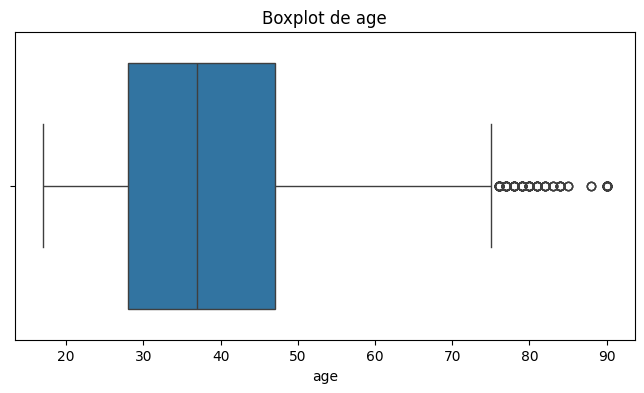

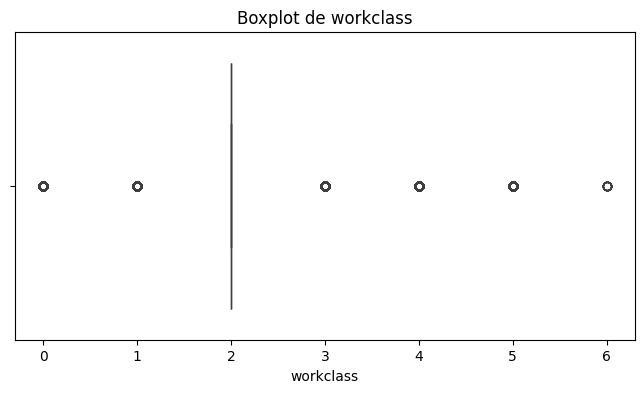

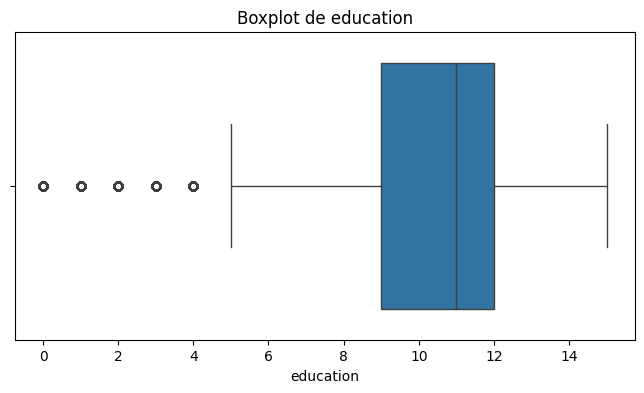

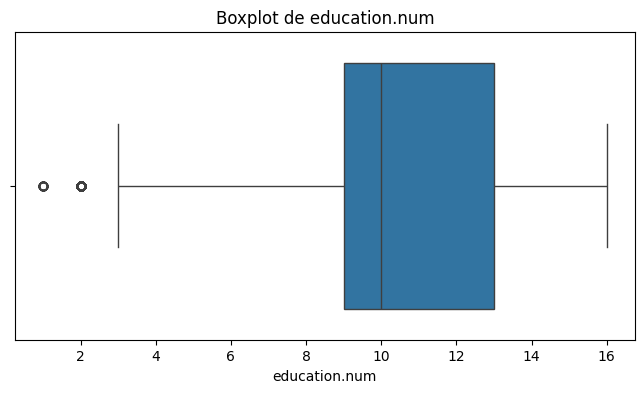

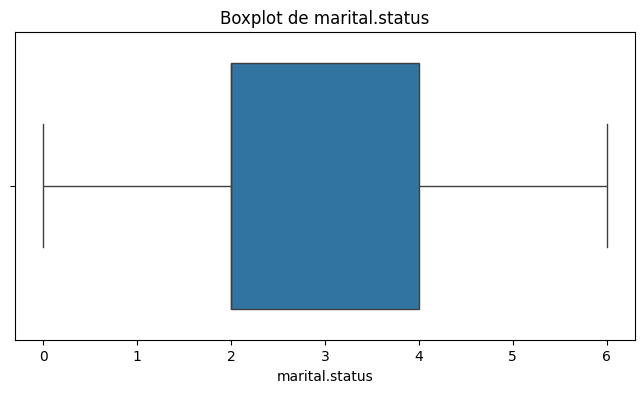

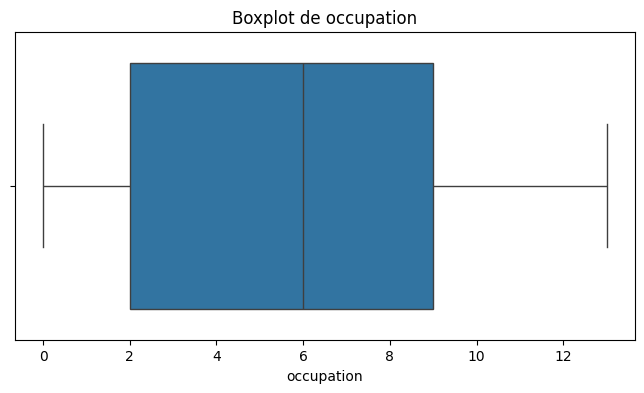

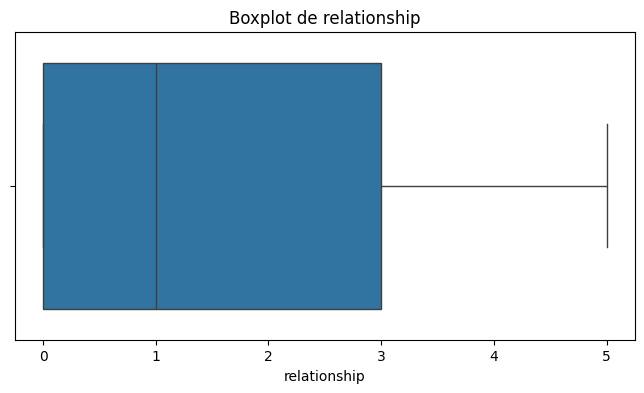

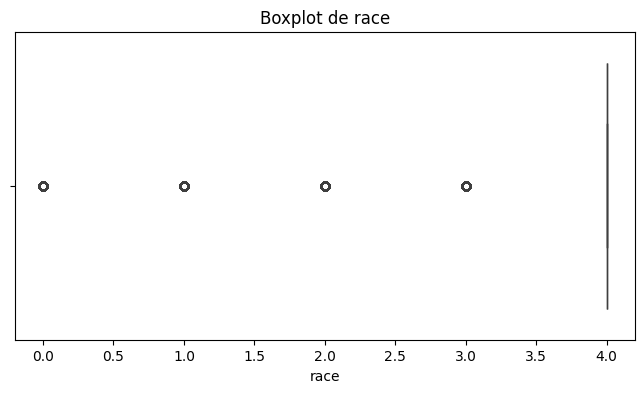

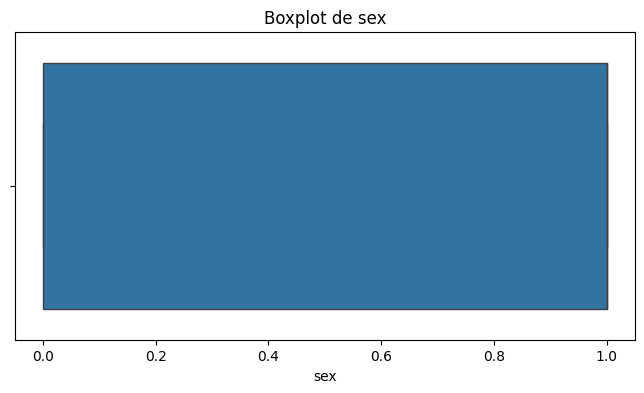

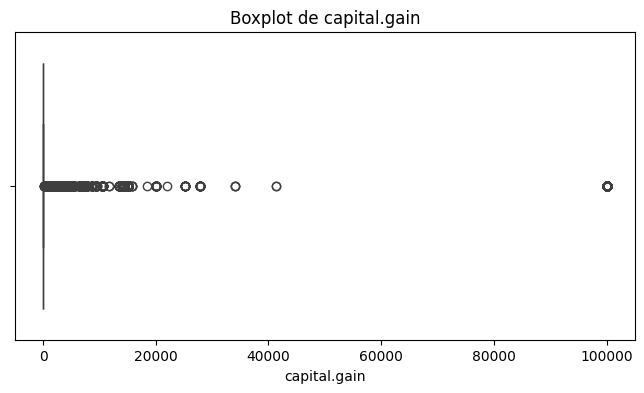

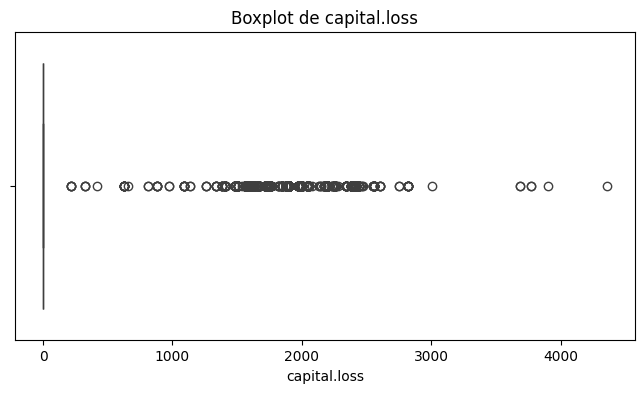

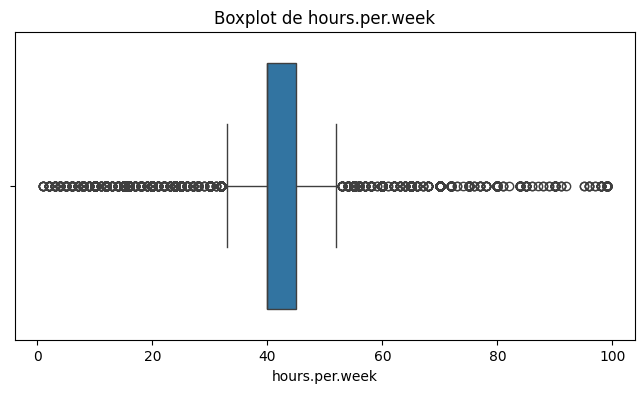

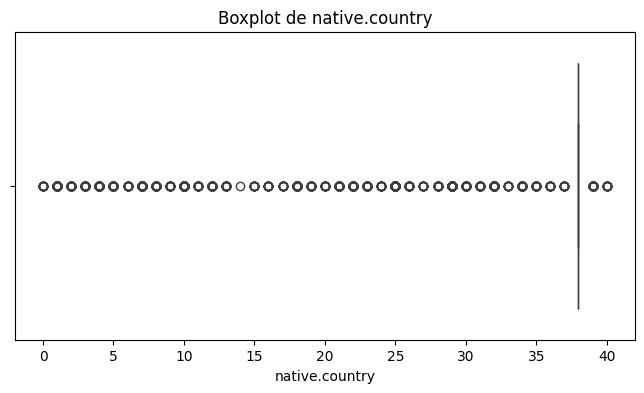

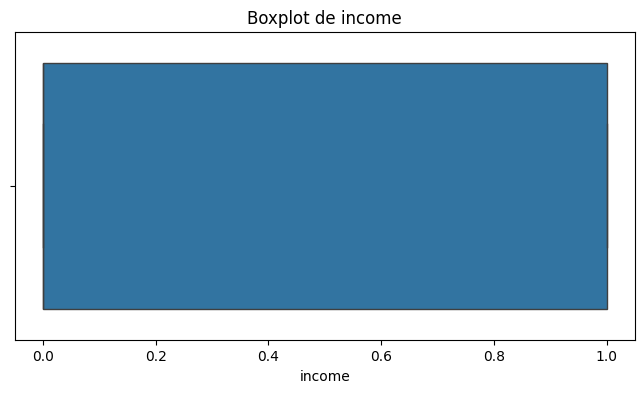

In [18]:
# Configuración del tamaño de los gráficos
plt.figure(figsize=(15, 8))

# Crear boxplots para todas las columnas
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

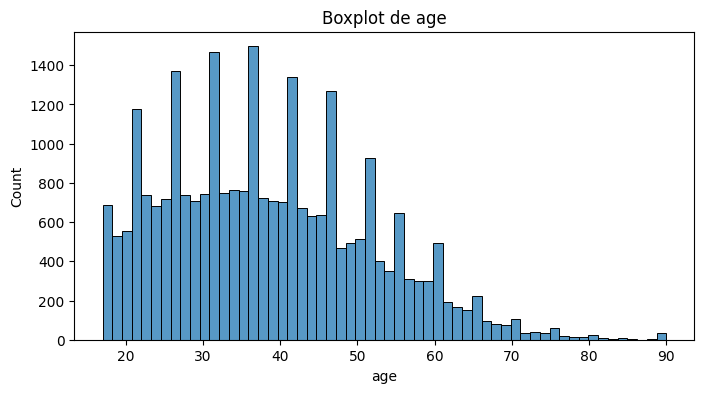

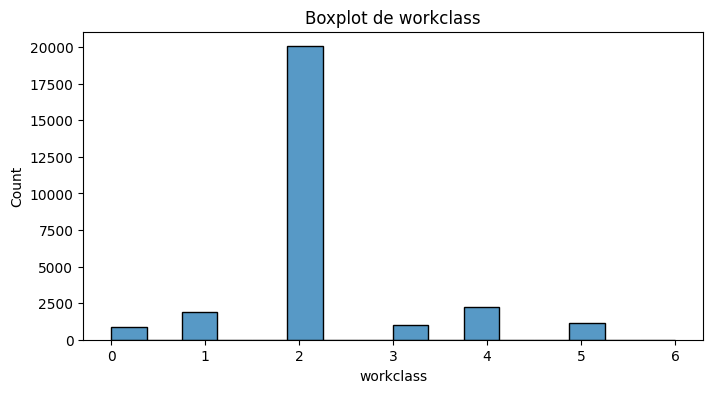

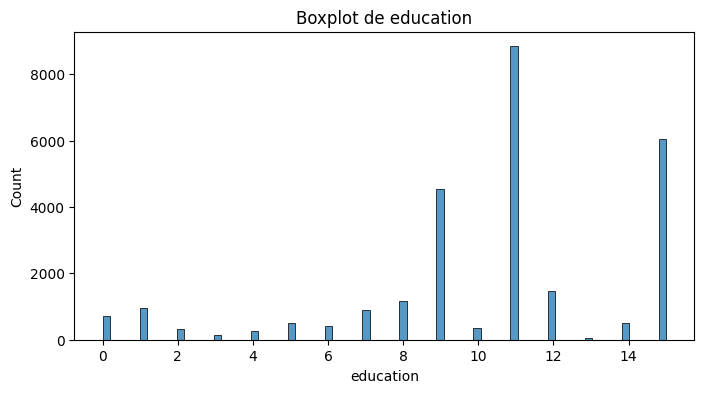

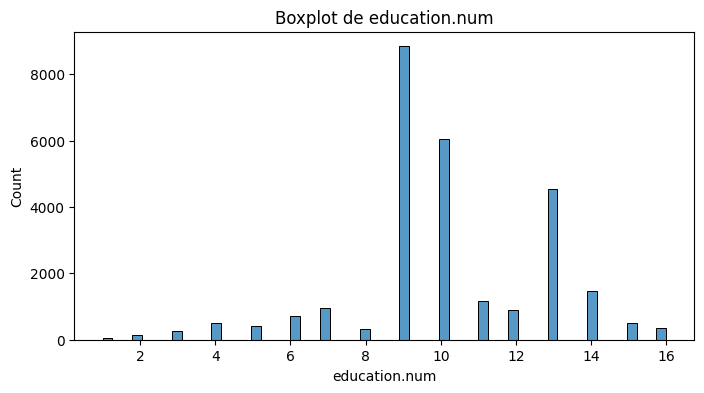

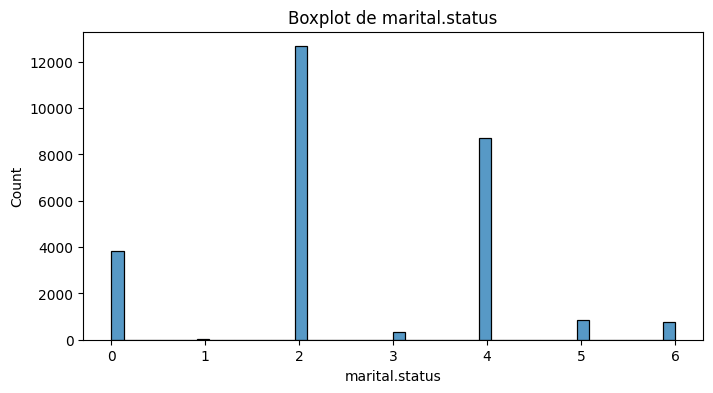

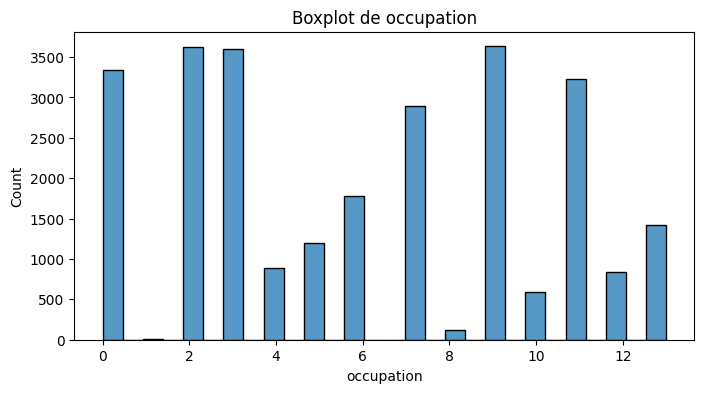

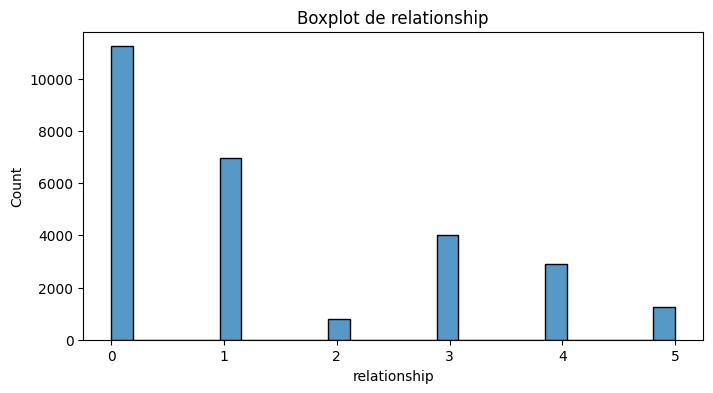

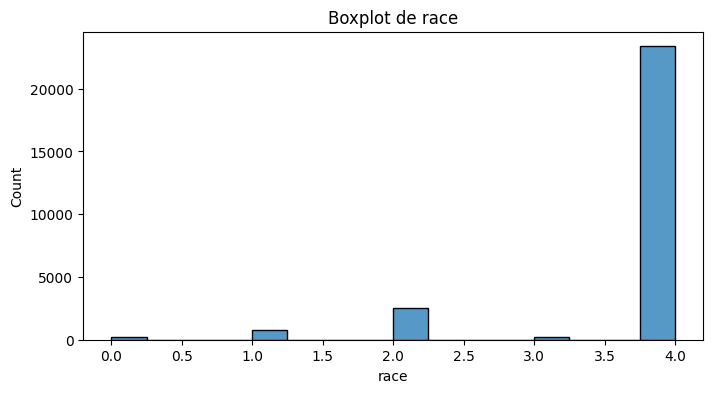

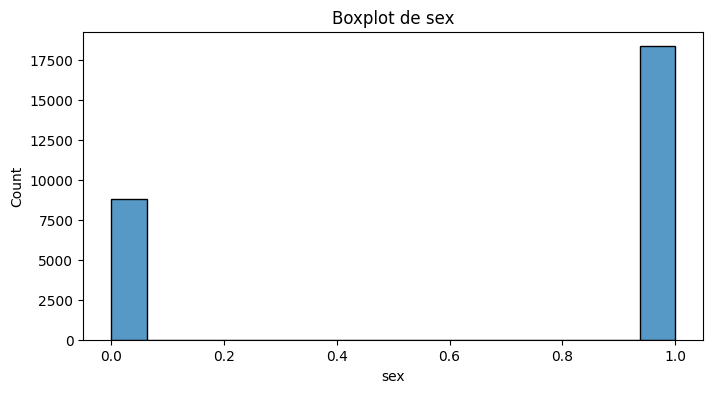

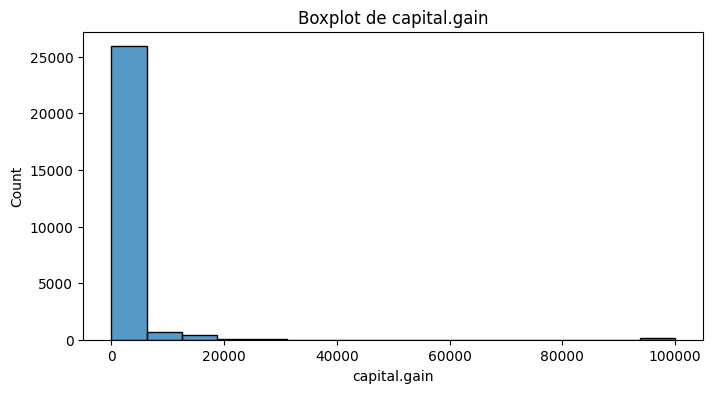

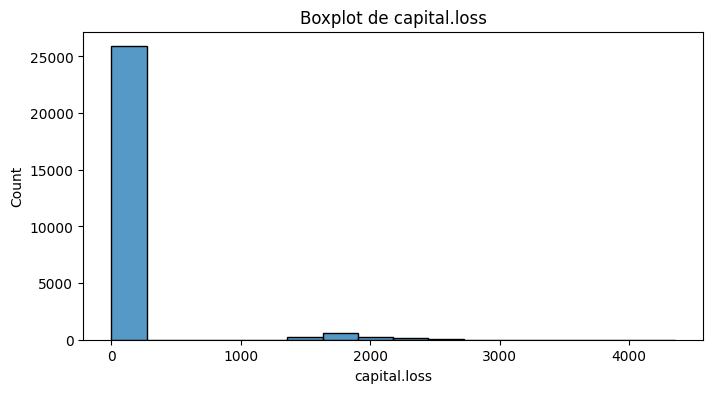

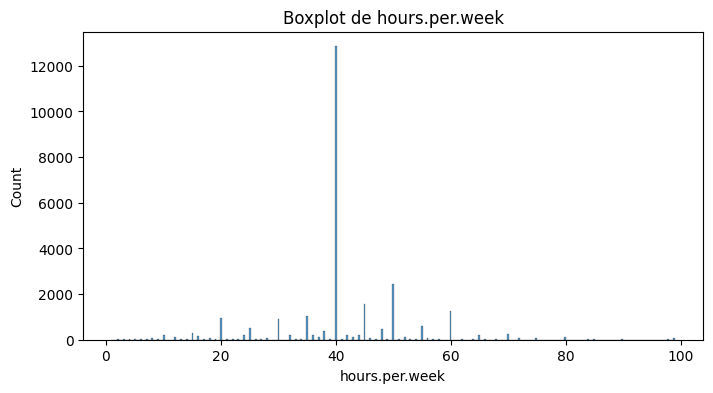

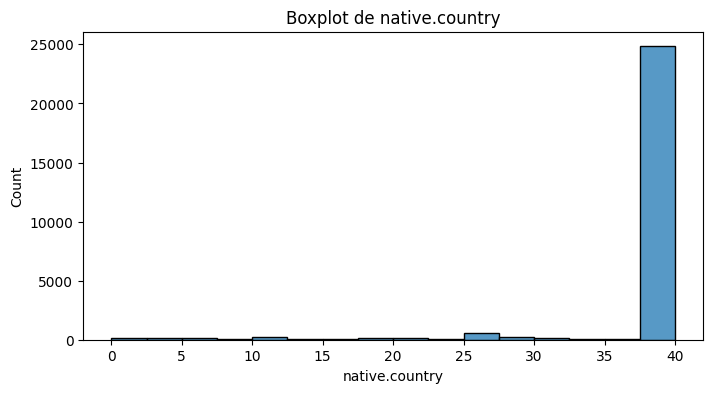

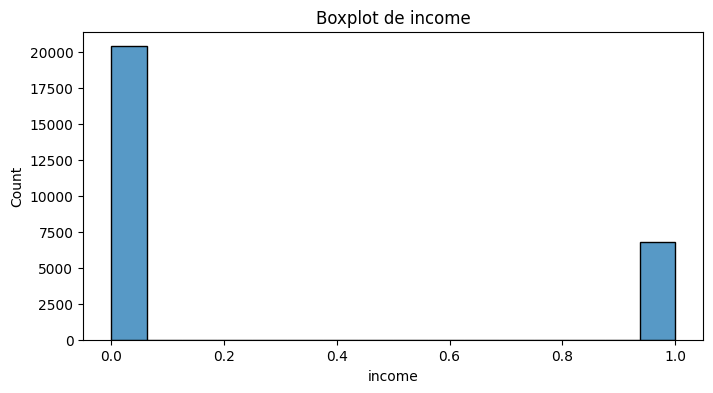

In [19]:
# Crear boxplots para todas las columnas
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Modelo

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

In [21]:
df.dtypes

age               int64
workclass         int64
education         int64
education.num     int64
marital.status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int64
income            int64
dtype: object

In [22]:
from sklearn.preprocessing import RobustScaler

# Crear el escalador
scaler_robust = RobustScaler()

# Aplicar a todas las variables numéricas
numerical_cols = ["age", "education.num", "capital.gain", "capital.loss", "hours.per.week"]
df[numerical_cols] = scaler_robust.fit_transform(df[numerical_cols])

# Ver los resultados
print(df.head())

        age  workclass  education  education.num  marital.status  occupation  \
0 -0.157895          2         11          -0.25               4           6   
1 -0.263158          2         11          -0.25               4           7   
2  1.157895          1         12           1.00               0           9   
3  0.368421          0         11          -0.25               0           2   
5  0.315789          1          9           0.75               2          10   

   relationship  race  sex  capital.gain  capital.loss  hours.per.week  \
0             1     2    1           0.0        2001.0             0.0   
1             1     4    1           0.0           0.0            -0.6   
2             4     4    0        8614.0           0.0             4.0   
3             4     4    1           0.0           0.0             0.0   
5             0     4    1           0.0           0.0             3.0   

   native.country  income  
0              38       0  
1              38 

In [23]:
X = df.drop(['income'],axis=1).values
y= df['income'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify= y_temp)

print("Distribución en Train:\n", np.bincount(y_train) / len(y_train))
print("\nDistribución en Validation:\n", np.bincount(y_val) / len(y_val))
print("\nDistribución en Test:\n", np.bincount(y_test) / len(y_test))

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_val: {X_val.shape}")
print(f"Tamaño de X_test: {X_test.shape}")

Distribución en Train:
 [0.7499474 0.2500526]

Distribución en Validation:
 [0.74987727 0.25012273]

Distribución en Test:
 [0.75012273 0.24987727]
Tamaño de X_train: (19012, 13)
Tamaño de X_val: (4074, 13)
Tamaño de X_test: (4074, 13)


In [24]:
# Convertir datos a tensores asegurando los tamaños correctos
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)  # ← Asegurar que sea de validación

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Verificar tamaños después de la conversión
print(f"Tamaño de X_train_tensor: {X_train_tensor.shape}")
print(f"Tamaño de y_train_tensor: {y_train_tensor.shape}")

print(f"Tamaño de X_val_tensor: {X_val_tensor.shape}")
print(f"Tamaño de y_val_tensor: {y_val_tensor.shape}")  # ← Debe ser (34421,)

print(f"Tamaño de X_test_tensor: {X_test_tensor.shape}")
print(f"Tamaño de y_test_tensor: {y_test_tensor.shape}")

Tamaño de X_train_tensor: torch.Size([19012, 13])
Tamaño de y_train_tensor: torch.Size([19012])
Tamaño de X_val_tensor: torch.Size([4074, 13])
Tamaño de y_val_tensor: torch.Size([4074])
Tamaño de X_test_tensor: torch.Size([4074, 13])
Tamaño de y_test_tensor: torch.Size([4074])


In [25]:
# Definir la Red Neuronal
class ModeloNN(nn.Module):
    def __init__(self, input_size):
        super(ModeloNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.5)  # Probabilidad de desactivación de 50%

    def forward(self, x):
        x = self.relu(self.fc1(x))             # Capa 1 + ReLU
        x = self.dropout(x)                    # Dropout después de la primera capa
        x = self.relu(self.fc2(x))             # Capa 2 + ReLU
        x = self.dropout(x)                    # Dropout después de la segunda capa
        x = self.relu(self.fc3(x))             # Capa 3 + ReLU
        x = self.fc4(x)                        # Capa de salida (sin activación ReLU ya que usamos Sigmoid más tarde)
        x = self.sigmoid(x)                    # Aplicar Sigmoid para obtener probabilidad
        return x

In [27]:
import torch
# from torchsummary import summary
print(torch.__version__)
print(torch.cuda.is_available())  # Debe imprimir True si hay GPU disponible
# Verificar si hay GPU disponible y mover el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Crear el modelo y moverlo a la GPU si está disponible
input_size = X_train.shape[1]  # Número de características
model = ModeloNN(input_size).to(device)

# Mostrar el sumario del modelo
# summary(model, (input_size,))  # Mostrar la estructura del modelo

2.6.0+cpu
False
Usando dispositivo: cpu


In [28]:
X_train_tensor = X_train_tensor.to(device)
X_val_tensor = X_val_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)

y_train_tensor = y_train_tensor.to(device)
y_val_tensor = y_val_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [29]:
# Definir función de pérdida y optimizador

# Usar la ponderación en la función de pérdida
criterion = nn.BCELoss()  # Binary Cross Entropy 
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Listas para almacenar las pérdidas
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Entrenamiento del modelo
epochs = 1000
for epoch in range(epochs):
    # Forward pass para el conjunto de entrenamiento
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.float())
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Guardar la pérdida de entrenamiento
    train_losses.append(loss.item())

    # Calcular precisión en entrenamiento
    train_preds = (outputs >= 0.3).int()
    train_acc = (train_preds == y_train_tensor).float().mean().item()
    train_accuracies.append(train_acc)

    # Evaluación en validación
    model.eval()  
    with torch.no_grad():
        val_outputs = model(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor.float())

        # Guardar la pérdida de validación
        val_losses.append(val_loss.item())

        # Calcular precisión en validación
        val_preds = (val_outputs >= 0.3).int()
        val_acc = (val_preds == y_val_tensor).float().mean().item()
        val_accuracies.append(val_acc)
    
    # Imprimir métricas cada 10 épocas
    if (epoch + 1) % 10 == 0:
        print(f"Época [{epoch+1}/{epochs}] - "
              f"Train Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f} - "
              f"Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc:.4f}")

Época [10/1000] - Train Loss: 0.7816, Train Acc: 0.2501 - Val Loss: 1.3730, Val Acc: 0.2278
Época [20/1000] - Train Loss: 0.5966, Train Acc: 0.4598 - Val Loss: 0.6121, Val Acc: 0.5665
Época [30/1000] - Train Loss: 0.6140, Train Acc: 0.7422 - Val Loss: 0.8284, Val Acc: 0.7403
Época [40/1000] - Train Loss: 0.9277, Train Acc: 0.7548 - Val Loss: 0.9121, Val Acc: 0.7548
Época [50/1000] - Train Loss: 0.5559, Train Acc: 0.7523 - Val Loss: 0.4981, Val Acc: 0.7582
Época [60/1000] - Train Loss: 1.6446, Train Acc: 0.7567 - Val Loss: 1.6494, Val Acc: 0.7538
Época [70/1000] - Train Loss: 0.6372, Train Acc: 0.7605 - Val Loss: 0.7604, Val Acc: 0.7545
Época [80/1000] - Train Loss: 0.5396, Train Acc: 0.7649 - Val Loss: 0.5927, Val Acc: 0.7548
Época [90/1000] - Train Loss: 0.6440, Train Acc: 0.7437 - Val Loss: 0.5075, Val Acc: 0.7595
Época [100/1000] - Train Loss: 0.5291, Train Acc: 0.7705 - Val Loss: 0.4708, Val Acc: 0.7646
Época [110/1000] - Train Loss: 0.5862, Train Acc: 0.7712 - Val Loss: 0.5304, Va

In [30]:
# Evaluación del modelo en el conjunto de validación
with torch.no_grad():
    val_outputs = model(X_val_tensor).view(-1)  # Ajustar la forma
    print(f"Tamaño de val_outputs: {val_outputs.shape}, Tamaño de y_val_tensor: {y_val_tensor.shape}")

    val_outputs = (val_outputs >= 0.5).int()  # Convertir probabilidades a clases (0 o 1)

# Calcular métricas en el conjunto de validación
val_accuracy = accuracy_score(y_val_tensor.cpu(), val_outputs.cpu())  # Mover a CPU antes de usar sklearn
print(f"\nAccuracy en Validation: {val_accuracy:.4f}")
print("\n", classification_report(y_val_tensor.cpu(), val_outputs.cpu()))  # Mover a CPU

Tamaño de val_outputs: torch.Size([4074]), Tamaño de y_val_tensor: torch.Size([4074])

Accuracy en Validation: 0.8333

               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      3055
         1.0       0.71      0.57      0.63      1019

    accuracy                           0.83      4074
   macro avg       0.79      0.74      0.76      4074
weighted avg       0.83      0.83      0.83      4074



In [33]:
# Export to pkl
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

C:\Users\pablo\AppData\Local\Temp\ipykernel_37320\1450336553.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=perm_importance_df, palette="viridis")


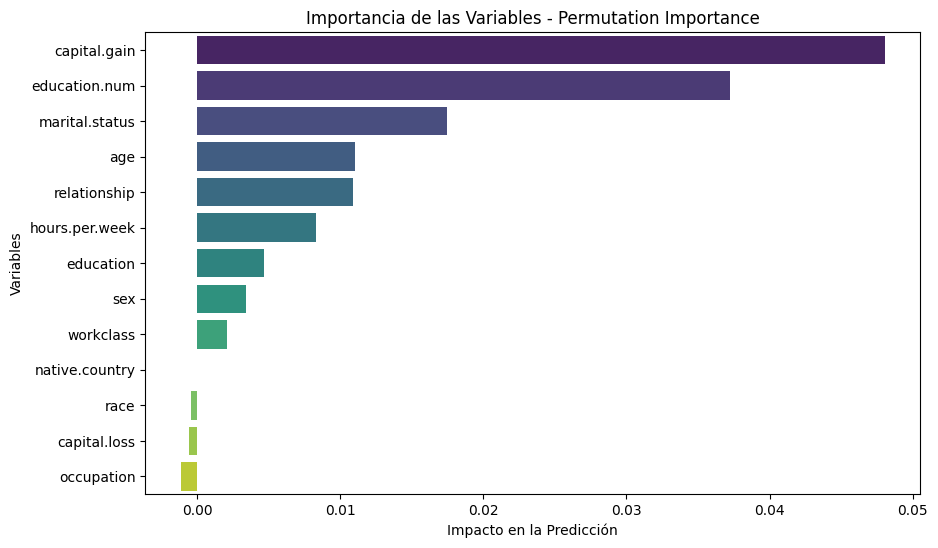

In [31]:
import torch
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance

# Crear un wrapper para que la red sea compatible con Scikit-Learn
class TorchModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model.eval()  # Poner en modo evaluación

    def fit(self, X, y):
        """Método requerido por Scikit-Learn, pero no se usa."""
        pass

    def predict(self, X):
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            outputs = self.model(X_tensor).squeeze().cpu().numpy()
            return (outputs >= 0.5).astype(int)  # Convertir a 0 o 1
    
    def predict_proba(self, X):
        """Devuelve las probabilidades de las clases"""
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            outputs = self.model(X_tensor).squeeze().cpu().numpy()
            return np.vstack([1 - outputs, outputs]).T  # Formato (N, 2)

# Crear el modelo compatible con Scikit-Learn
wrapped_model = TorchModelWrapper(model)

# Convertir X_val e y_val a NumPy
X_val_np = X_val.cpu().numpy() if isinstance(X_val, torch.Tensor) else np.array(X_val)
y_val_np = y_val.cpu().numpy() if isinstance(y_val, torch.Tensor) else np.array(y_val)

# Calcular Permutation Importance
result = permutation_importance(wrapped_model, X_val_np, y_val_np, n_repeats=10, random_state=42, scoring="accuracy")

# Asegurar que los nombres de las variables sean los correctos
feature_names = list(df.columns[:-1])  # Suponiendo que la última columna es la variable objetivo

# Crear DataFrame con los resultados de Permutation Importance
perm_importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by="Importancia", ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Variable", data=perm_importance_df, palette="viridis")
plt.title("Importancia de las Variables - Permutation Importance")
plt.xlabel("Impacto en la Predicción")
plt.ylabel("Variables")
plt.show()

## Random Forest

In [32]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Crear el modelo XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",  # Para clasificación binaria
    eval_metric="logloss",  # Métrica de evaluación
    use_label_encoder=False,  # Para evitar warnings
    n_estimators=100,  # Número de árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=6,  # Profundidad máxima del árbol
    subsample=0.8,  # Muestreo de datos para evitar overfitting
    colsample_bytree=0.8,  # Muestreo de características por árbol
    random_state=42
)

# Entrenar el modelo con validación
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Evaluar en train y validación
    early_stopping_rounds=10,  # Detener si la validación no mejora en 10 iteraciones
    verbose=True  # Mostrar progreso del entrenamiento
)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy en Test: {accuracy:.4f}")

print("\nClassification Report en Test:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix en Test:\n", confusion_matrix(y_test, y_pred))

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'